<h1 style="font-weight: bold;">POLINOMIAL REGRESSION with SCIKIT-LEARN</h1>


<p style="font-size: 20px; font-weight: 400;"><i>The Dataset in CSV format</i> is converted to <i>a Pandas Dataframe</i>.</p>


In [1]:
import pandas as pd

df = pd.read_csv("polynomial_regression_dataset.csv")
df.head()

,X,Y
0,2.271,654.795
1,6.954,51033.102
2,13.851,787088.990
3,16.879,1729839.698
4,23.212,6161201.263


<p style="font-size: 20px; font-weight: 400;"><i>The Dataframe</i> is divided into <i>Features (X)</i> and <i>Labels (Y)</i> datasets.</p>

In [2]:
x, y = df.iloc[:,0:1], df.iloc[:,1]

<p style="font-size: 20px; font-weight: 400;"><i>The Features (X)</i> and <i>Labels (Y)</i> are splitted into their corresponding <i>Train</i> and <i>Test</i> sets, with <i>the Test size</i> being <i>one-fifth</i> of the whole dataset.</p>

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

<h2 style="font-weight: bold;">Finding The Optimal Degree for Polynomial Regression </h2>
<p style="font-size: 20px; font-weight: 400;">
To find the optimal degree for regression, different regression models with degrees ranging from 1 to 11 are applied, and their mean square errors (MSE) are calculated. The model with the smallest MSE is chosen as the best model.</p>

<p style="font-size: 20px; font-weight: 400;">For each degree, a PolynomialFeatures object is instantiated using Scikit-Learn library. This object is fitted to the training features and then used to transform these features polynomially. </p>
<p style="font-size: 20px; font-weight: 400;">Subsequently, a LinearRegression object is also created with Scikit-Learn library. The model is then trained by fitting it with the polynomially transformed training features and the corresponding training labels. Afterwards, the trained model is used to make predictions on the test set, utilizing the polynomially transformed test features.  The predictions are stored in a dictionary named <i>'P'</i></p>
<p style="font-size: 20px; font-weight: 400;">Finally, the Mean Squared Error values for each model are calculated and stored in a dictionary named <i>'mean_square_errors'</i></p>

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

P, mean_square_errors = {}, {}
for i in range(1,11):
    poly = PolynomialFeatures(degree = i)
    poly_X = poly.fit_transform(x_train)

    lr = LinearRegression()
    lr.fit(poly_X, y_train)
    preds = lr.predict(poly.fit_transform(x_test))
    P[i] = preds
    
    mean_square_error = sum((preds-y_test)**2)/y.shape[0]
    mean_square_errors[i] = mean_square_error


<p style="font-size: 20px; font-weight: 400;">The bar chart below illustrates <i>the mean_square_errors</i> of the models across degrees ranging from 1 to 11.</p>

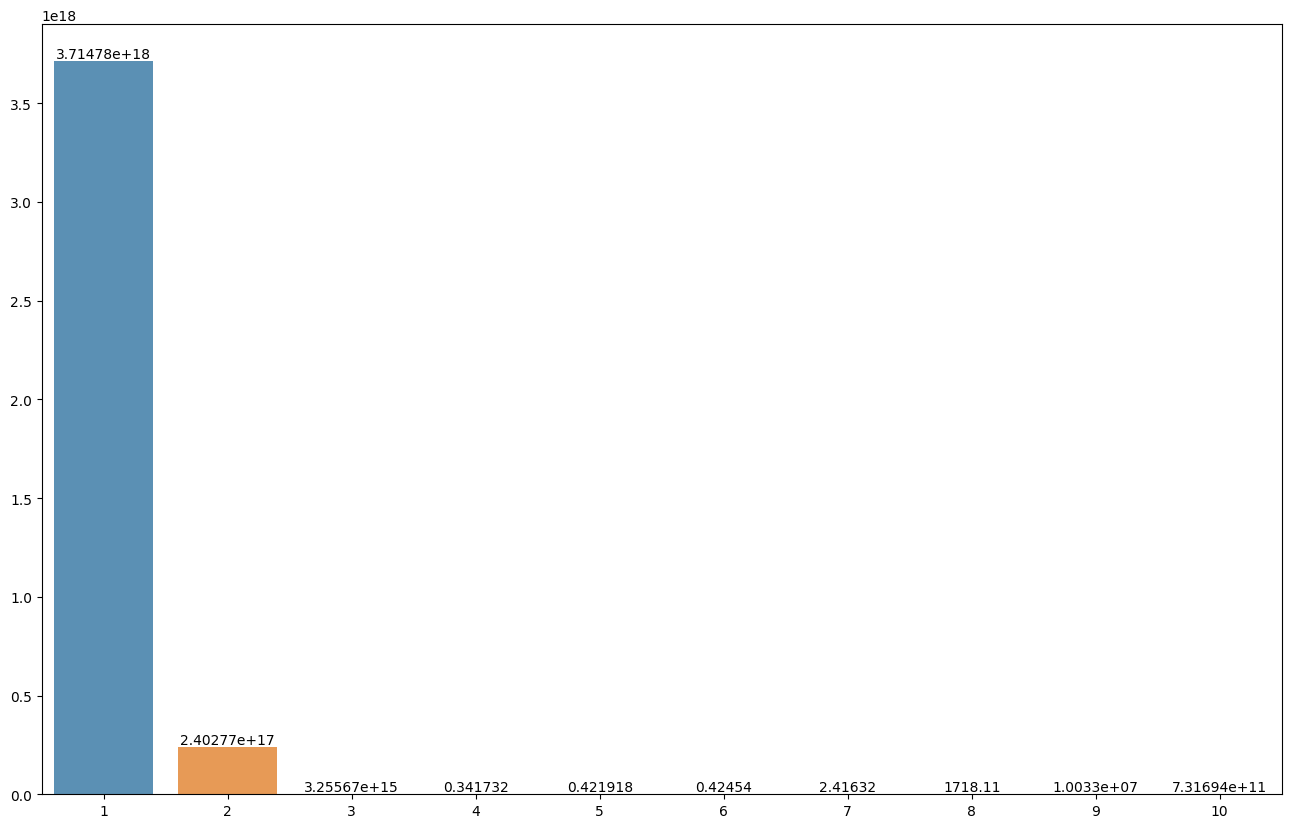

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

mse = list(mean_square_errors.values())

fig = plt.figure(figsize=(16,10))
colors = [sns.color_palette()[i] for i in [0,-1,4,1,-2,2]]

s = sns.barplot(x=list(mean_square_errors),
                y=mse,
                alpha=.8,
                hue=list(mean_square_errors),
                palette=sns.color_palette())

[s.bar_label(i,) for i in s.containers]
plt.legend().set_visible(False)
plt.show()

<p style="font-size: 20px; font-weight: 400;">The MSE value, which is very high at the 1st degree, significantly decreases as the degree increases, reaching its minimum value at the 4th degree. Beyond that, the MSE value starts increasing exponentially with each additional degree, exhibiting like a U-shaped curve in its progression.</p>

<p style="font-size: 20px; font-weight: 400;">
Consequently, the model with the smallest MSE value corresponds to the one with a <i>4th-degree polynomial</i>. This conclusion is supported by the instructions provided below, as illustrated by the chart above.</p>

In [6]:
best_degree = list(mean_square_errors)[mse.index(min(mse))]
print("best_degree:", best_degree)

best_degree: 4


<h2 style="font-weight: bold;">Comparative Analysis of Regression Models Across Various Degrees</h2>

<p style="font-size: 20px; font-weight: 400;">
In the graph displayed below, <i>the actual y values</i> for the test set are plotted alongside several regression lines for comparison: <i>the linear regression line</i>, <i>the polynomial regression line of degree two</i>, and <i>the polynomial regression line with the optimal degree</i>. This visualization is designed to facilitate a comparison to determine which regression model most closely aligns with the actual y values, thereby identifying the model that best fits the data.</p>

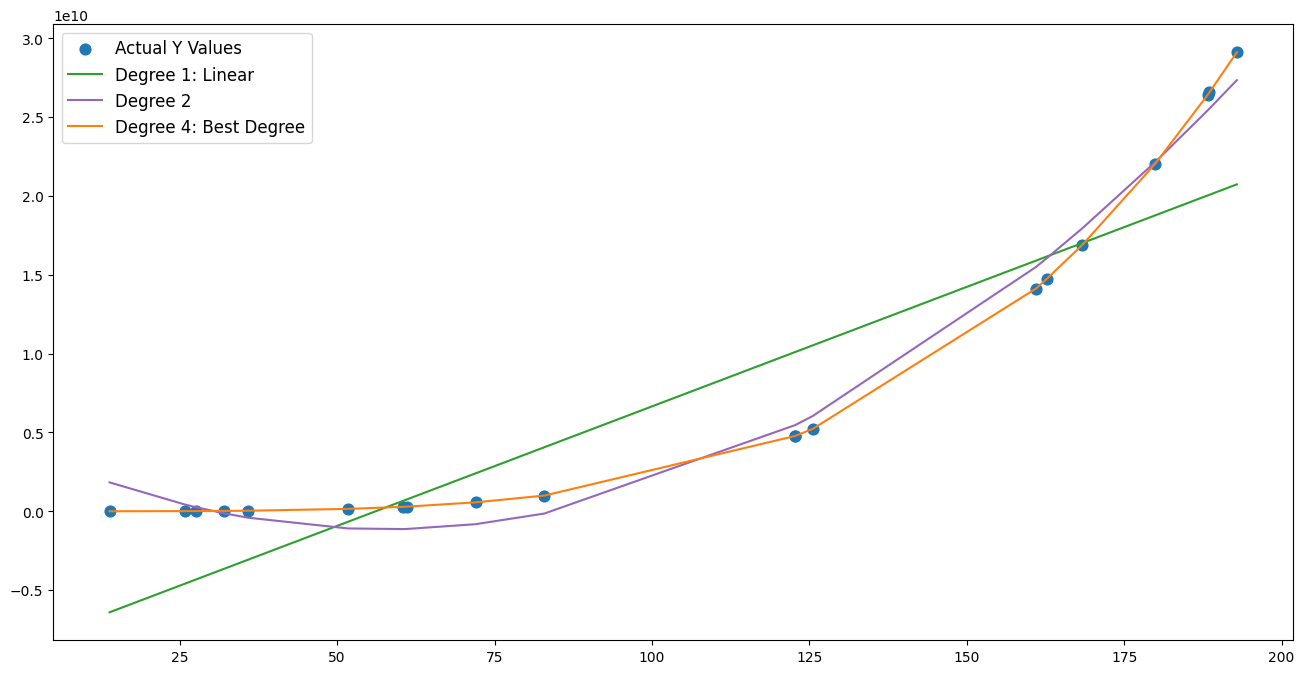

In [7]:
plt.figure(figsize=[16,8])

#Actual Y Values 
plt.scatter(x_test.values.reshape(-1),
            y_test,
            color=sns.color_palette()[0],
            s=60,
            label="Actual Y Values")

#Linear Regression Line (GREEN)
sns.lineplot(x=x_test.values.reshape(-1),
             y=P[1].reshape(-1),
             color=sns.color_palette()[2],
             label="Degree 1: Linear")

#Polynomial Regression Line with Degree 2 (PURPLE)
sns.lineplot(x=x_test.values.reshape(-1),
             y=P[2].reshape(-1),
             color=sns.color_palette()[4],
             label="Degree 2")

#Polynomial Regression Line with BEST Degree (ORANGE)
sns.lineplot(x=x_test.values.reshape(-1),
             y=P[best_degree].reshape(-1),
             color=sns.color_palette()[1],
             label=f"Degree {best_degree}: Best Degree")


plt.legend(fontsize='12')
plt.show()

<p style="font-size: 20px; font-weight: 400;">Upon comparing the actual y values to these three distinct lines, it is clearly evident that the polynomial regression model, particularly the one with a 4th degree that also has the smallest MSE value, provides the most accurate fit to the actual y values.</p>

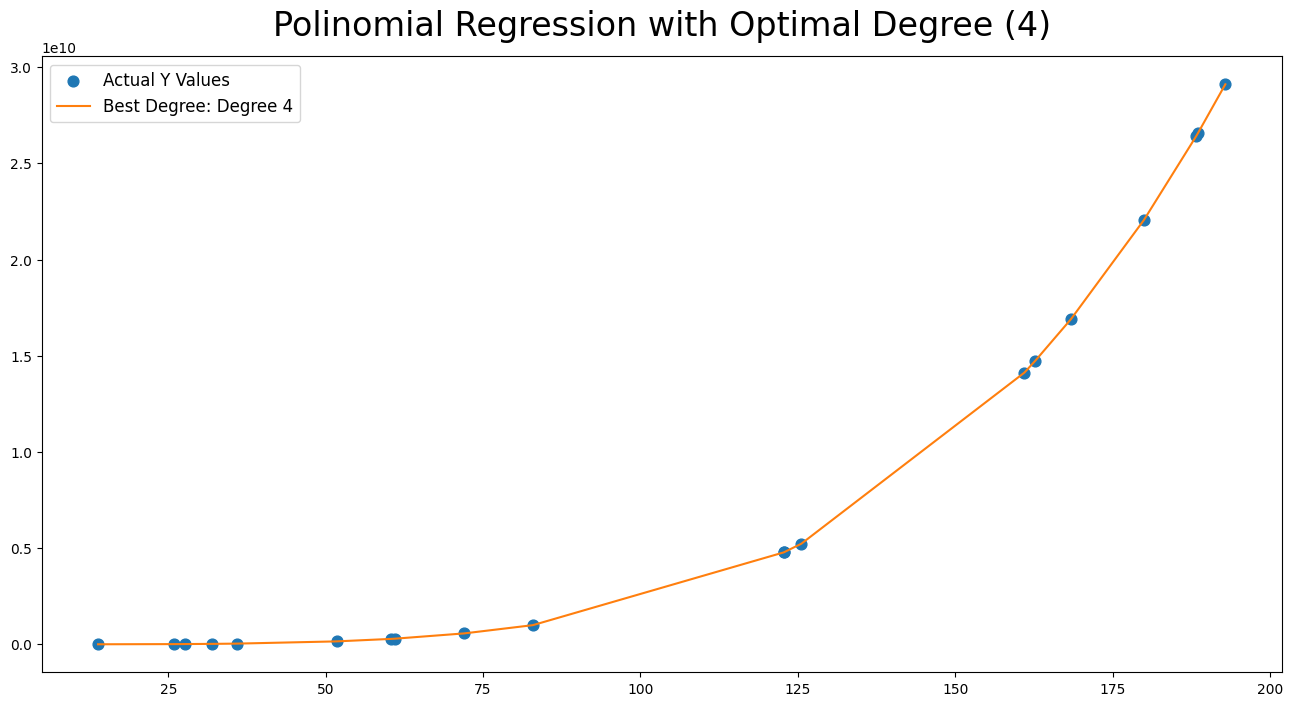

In [8]:
plt.figure(figsize=[16,8])

#Actual Y Values(BLUE)
plt.scatter(x_test.values.reshape(-1),
            y_test,
            color=sns.color_palette()[0],
            s=60,
            label="Actual Y Values")

#Polynomial Regression Line with BEST Degree (ORANGE)
sns.lineplot(x=x_test.values.reshape(-1),
             y=P[best_degree].reshape(-1),
             color=sns.color_palette()[1],
             label=f"Best Degree: Degree {best_degree}")


plt.title(f"Polinomial Regression with Optimal Degree ({best_degree})",fontsize=24, pad=15)
plt.legend(fontsize='12')
plt.show()

<p style="font-size: 20px; font-weight: 400;">This graph is crafted to facilitate an easy comparison between the actual 
y values and the optimal polynomial regression model, showcasing the fit.</p>